# Since I already have pyforest installed in my system; I do not need to import basic libraries

In [5]:
from math import sqrt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline

In [6]:
# Lets import and read the dataset

df=pd.read_excel('1673873196_hr_comma_sep.xlsx')
df.head(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


In [7]:
# Lets check the shape of the dataset

df.shape

(14999, 10)

In [8]:
# Lets check if we have some missing values

df.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

In [9]:
# Since we have no missing values; Lets check the data types of the columns

df.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
sales                     object
salary                    object
dtype: object

In [10]:
# sales and salary columns have categorical or nominal data. Lets check the unique values in the columns

df['sales'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [11]:
# sales column name seems to be incorrect since it contains department name. Also, column 'average_montly_hours' is incorrect
# Hence we need to change the column names of 'average_monttly_hours' and 'sales'

df=df.rename(columns={'sales':'department'})
df=df.rename(columns={'average_montly_hours':'average_monthly_hours'})
df.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [12]:
# Lets check the shape of the dataset again to confirm
df.shape

(14999, 10)

In [13]:
# The dataset seems to have similar shape. Lets check the categorical data of column 'salary'

df['salary'].unique()

array(['low', 'medium', 'high'], dtype=object)

<AxesSubplot:xlabel='left', ylabel='count'>

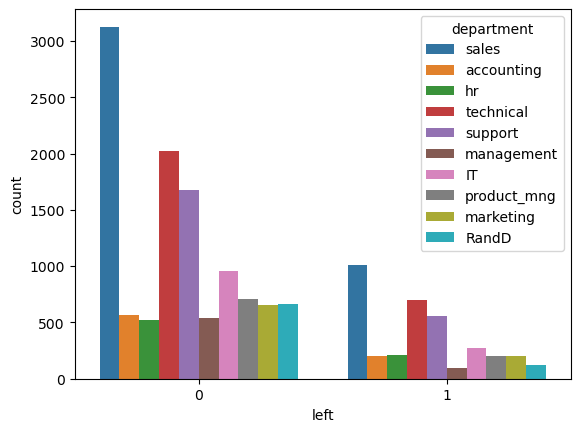

In [14]:
# Lets plot the graph of employees' left based on the department
sns.countplot(x='left',hue='department',data=df)

# Based on the above graph we can see that 'Sales' department has highest employee turnover followed by 'technical' and 'support' department which is 1000,700 and more than 500 respectively i.e. around 2200 left from these departments.

<AxesSubplot:xlabel='left', ylabel='count'>

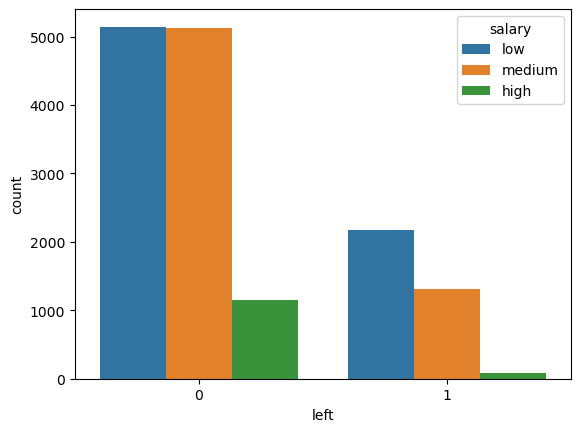

In [15]:
# Lets plot graph of employees' left based on the salary
sns.countplot(x='left',hue='salary',data=df)

# The above graph reveals that highest number of employees' left are from low salary band which is around 2100 and around 1200 left from the medium salary band

<AxesSubplot:>

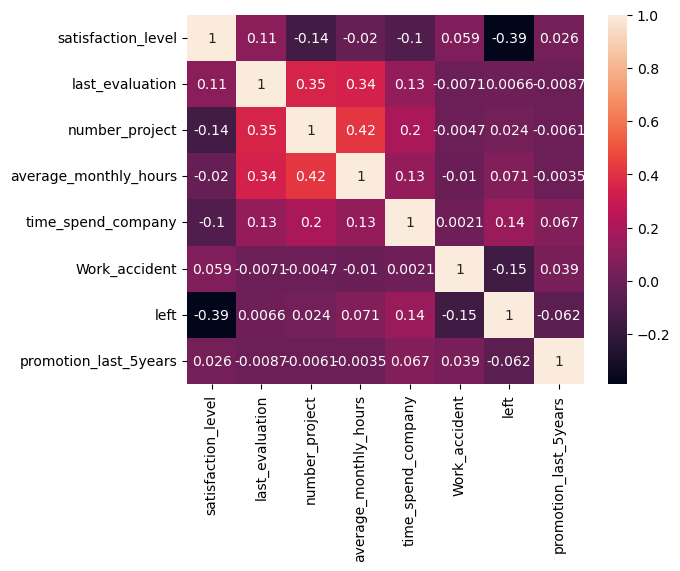

In [16]:
# Before we change the categorical values to numeric values; Lets explore the dataset more

sns.heatmap(df.corr(),annot=True)

# The heatmap reveals that the column "time_spend_company" has strong relation with column "left". We may have good visualization, if we may convert 'salary' and 'department' column into numerical values

<AxesSubplot:xlabel='average_monthly_hours', ylabel='Count'>

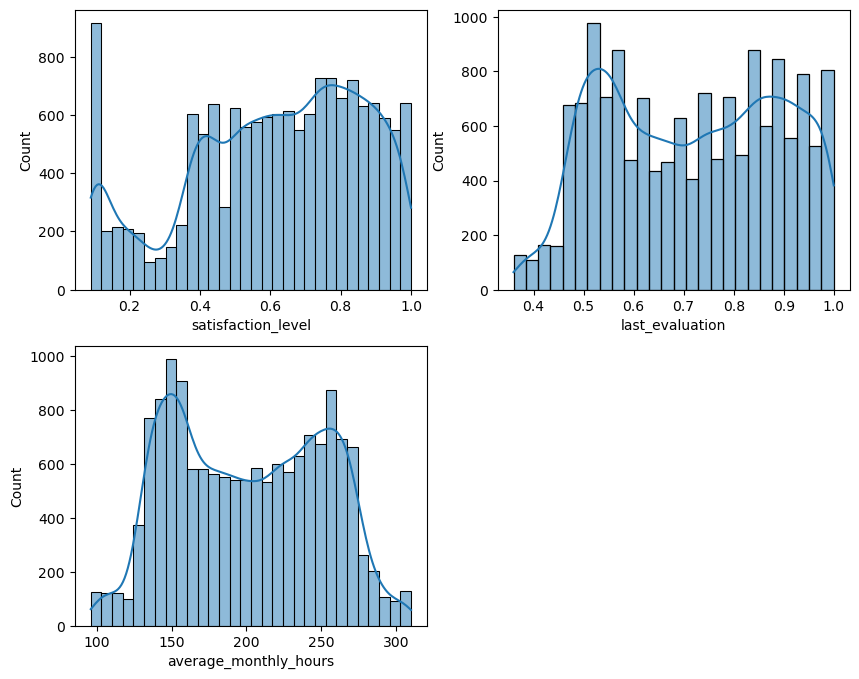

In [17]:
# Lets draw a distribution plot to explore further

plt.figure(figsize=(10,8))
plt.subplot(2,2,1)
sns.histplot(x='satisfaction_level',data=df,kde=True)
plt.subplot(2,2,2)
sns.histplot(x='last_evaluation',data=df,kde=True)
plt.subplot(2,2,3)
sns.histplot(x='average_monthly_hours',data=df,kde=True)

# The distribution of data is not normal in the above plots. The 'satisfaction_level' graph does not show a bell curve or a Gaussian distribution which reveals that the last_evaluation of employees were not satisfactory.

<AxesSubplot:xlabel='time_spend_company', ylabel='count'>

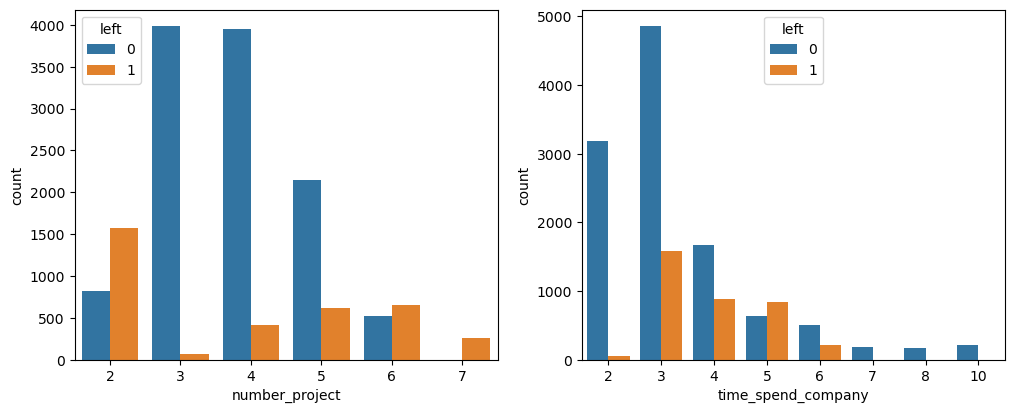

In [18]:
# Lets explore the employee turnover w.r.t the projects they have worked and time spend in the company

plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
sns.countplot(x='number_project',hue='left',data=df)
plt.subplot(2,2,2)
sns.countplot(x='time_spend_company',hue='left',data=df)

# The above graph states that the highest number of employees left i.e. around 1600 are ones who worked on only 2 projects. Similarly, the highest no. of employees left are those who spent 3-5 years i.e. around 3300 employees. Lets deepdive and create a new dataframe with columns 'satisfaction_level','last_evaluation' and 'left' and put it into clusters to evaluate employee turnover as the no.s are quite high

In [19]:
X=df[['satisfaction_level','last_evaluation','left']]
X.head()

,satisfaction_level,last_evaluation,left
0,0.38,0.53,1
1,0.80,0.86,1
2,0.11,0.88,1
3,0.72,0.87,1
4,0.37,0.52,1


In [20]:
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')
kmeans=KMeans(n_clusters=3)
kmeans.fit(X)

KMeans(n_clusters=3)

In [21]:
kmeans.cluster_centers_

array([[ 8.12219588e-01,  7.40336346e-01, -1.30451205e-15],
       [ 4.40098012e-01,  7.18112574e-01,  1.00000000e+00],
       [ 4.57069887e-01,  6.79611028e-01, -2.44249065e-15]])

In [22]:
print(kmeans.labels_)
print(len(kmeans.labels_))

[1 1 1 ... 1 1 1]
14999


In [23]:
print(type(kmeans.labels_))

<class 'numpy.ndarray'>


In [24]:
unique,counts=np.unique(kmeans.labels_,return_counts=True)
print(dict(zip(unique,counts)))

{0: 6733, 1: 3571, 2: 4695}


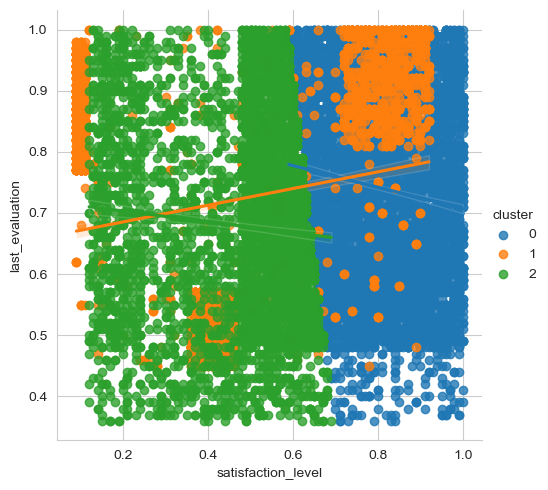

In [25]:
X['cluster']=kmeans.labels_
sns.set_style('whitegrid')
sns.lmplot('satisfaction_level','last_evaluation',hue='cluster',data=X)

# Based on the above graph we can see that 3 clusters have been created, however the data seems to be imbalanced. Lets use smote technique to balance the dataset

In [26]:
# Lets separate the categorical and numerical data columns and convert the categorical columns to numeric ones

num_df=df.iloc[:, :-2]

In [27]:
num_df.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,left,promotion_last_5years
0,0.38,0.53,2,157,3,0,1,0
1,0.80,0.86,5,262,6,0,1,0
2,0.11,0.88,7,272,4,0,1,0
3,0.72,0.87,5,223,5,0,1,0
4,0.37,0.52,2,159,3,0,1,0


In [28]:
num_df.shape

(14999, 8)

In [29]:
cat_df=df.iloc[:, 8:10]

In [30]:
cat_df.head()

,department,salary
0,sales,low
1,sales,medium
2,sales,medium
3,sales,low
4,sales,low


In [31]:
cat_df.shape

(14999, 2)

In [32]:
num1_df=pd.get_dummies(cat_df['department'],prefix='department')
num1_df.head()

,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,1,0,0


In [33]:
num1_df.shape

(14999, 10)

In [34]:
num2_df=pd.get_dummies(cat_df['salary'],prefix='salary')
num2_df.head()

,salary_high,salary_low,salary_medium
0,0,1,0
1,0,0,1
2,0,0,1
3,0,1,0
4,0,1,0


In [35]:
# Lets add the original and converted numerical dataframes altogether
df1=pd.concat([num_df,num1_df,num2_df],axis=1)
df1.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department_IT,department_RandD,...,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [36]:
df1.shape

(14999, 21)

In [37]:
# Lets move the column 'left' to the last column of the dataset

col=df1.pop('left')
df1['employee_left']=col
df1.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,promotion_last_5years,department_IT,department_RandD,department_accounting,...,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_high,salary_low,salary_medium,employee_left
0,0.38,0.53,2,157,3,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,1
1,0.80,0.86,5,262,6,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,1
2,0.11,0.88,7,272,4,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,1
3,0.72,0.87,5,223,5,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,1
4,0.37,0.52,2,159,3,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,1


<AxesSubplot:>

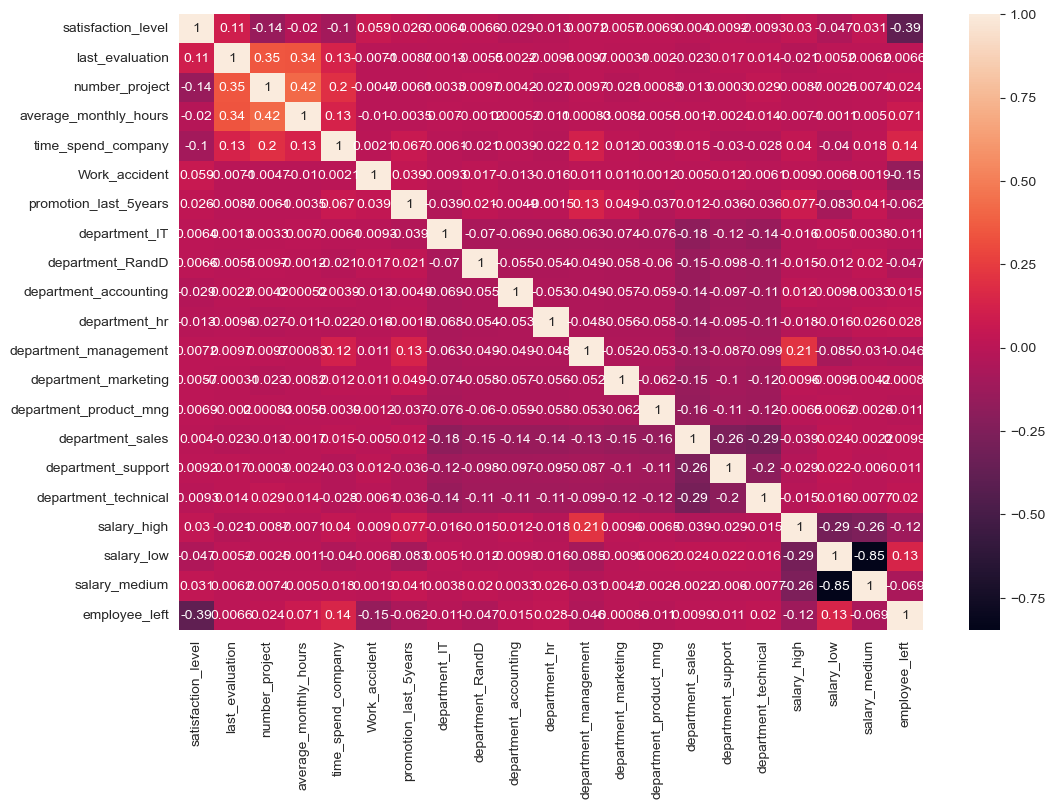

In [38]:
# Lets plot the graph to see the relationship of employee left with other columns

plt.figure(figsize=(12,8))
sns.heatmap(df1.corr(), annot=True)

# The above heatmap graph reveals that the Employee left has strong relationship with 'Salary_low' and 'time_spend_company'

In [39]:
# Lets separate the independent and dependent variables and use smote technique to balance the imbalanced data
smote_x=df1.iloc[:, :-1]
smote_y=df1.iloc[:, -1]

In [40]:
smote_x_train,smote_x_test,smote_y_train,smote_y_test=train_test_split(smote_x,smote_y,test_size=0.20,random_state=123)

In [42]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(sampling_strategy=1.0)
smote_x_train_resampled,smote_y_train_resampled=smote.fit_resample(smote_x_train,smote_y_train)

In [43]:
print(pd.Series(smote_y_train).value_counts())
print(pd.Series(smote_y_train_resampled).value_counts())

0    9137
1    2862
Name: employee_left, dtype: int64
0    9137
1    9137
Name: employee_left, dtype: int64


In [44]:
# Lets take the 'satisfaction_level' and 'last_evaluation' from smote_x_train_resampled and 'left' from smote_y_train_resampled
smote_x_train_resampled.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,promotion_last_5years,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_high,salary_low,salary_medium
0,0.31,0.64,6,183,2,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0
1,0.59,0.81,4,200,2,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
2,0.38,0.51,2,159,3,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
3,0.95,0.77,5,199,10,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
4,0.50,0.77,3,265,3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1


In [50]:
x1=smote_x_train_resampled.iloc[:, :2]
y1=smote_y_train_resampled
x_final=pd.concat([x1,y1],axis=1)
x_final.head()

,satisfaction_level,last_evaluation,employee_left
0,0.31,0.64,0
1,0.59,0.81,0
2,0.38,0.51,1
3,0.95,0.77,0
4,0.50,0.77,0


In [63]:
kmeans1=KMeans(n_clusters=3)
kmeans1.fit(x_final)

KMeans(n_clusters=3)

In [64]:
kmeans1.cluster_centers_

array([[ 6.68151472e-01,  7.14415016e-01,  0.00000000e+00,
         1.00000000e+00],
       [ 3.01299066e-01,  6.45069440e-01,  1.00000000e+00,
         2.00000000e+00],
       [ 8.05321498e-01,  9.09670969e-01,  1.00000000e+00,
        -1.11022302e-15]])

In [65]:
print(kmeans1.labels_)
print(len(kmeans1.labels_))

[0 0 1 ... 2 2 1]
18274


In [66]:
print(type(kmeans1.labels_))

<class 'numpy.ndarray'>


In [67]:
unique1,counts1=np.unique(kmeans1.labels_,return_counts=True)
print(dict(zip(unique1,counts1)))

{0: 9137, 1: 6682, 2: 2455}


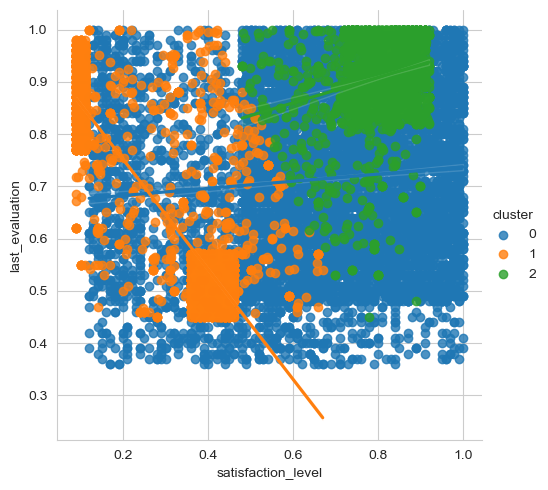

In [68]:
x_final['cluster']=kmeans1.labels_
sns.set_style('whitegrid')
sns.lmplot('satisfaction_level','last_evaluation',hue='cluster',data=x_final)

# The above graph now reveals that the major concentration of Left employees w.r.t satisfaction level is at 0.4 in Cluster1,0.7 in cluster0 and 0.8 in Cluster2. The drawback of Kmeans is that the cluster segregation is unequal, due to which the concentration on each cluster changes everytime.

In [69]:
# Now lets see which classification model would give better prediction of employee turnover using 5fold cross validation score
# Lets start with LogisticRegression

from sklearn.model_selection import StratifiedKFold
kf=StratifiedKFold(n_splits=5,shuffle=True)

In [70]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [71]:
from sklearn.model_selection import cross_val_score
cv_scores=cross_val_score(lr,smote_x_train_resampled,smote_y_train_resampled,cv=kf,scoring='roc_auc')

In [72]:
print('Cross Validation Score Mean:', np.mean(cv_scores)*100)
print('Cross Validation Score Standard Deviation:', np.std(cv_scores))

Cross Validation Score Mean: 85.56436621792335
Cross Validation Score Standard Deviation: 0.01329097559507854


# I performed the 5-Fold cross-validation using LogisticRegression model and evaluate the performance using roc_auc. The performance shows 85.65% roc_auc score

In [73]:
# Lets plot the classification report of the cross validation of our LogisticRegression model
from sklearn.metrics import classification_report
lr.fit(smote_x_train_resampled,smote_y_train_resampled)

LogisticRegression()

In [74]:
y_pred=lr.predict(smote_x_test)
report=classification_report(smote_y_test,y_pred,output_dict=True)

<AxesSubplot:>

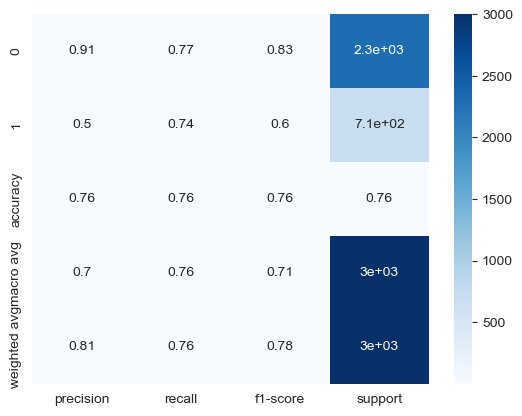

In [75]:
# Lets view the report using heatmap

report_df=pd.DataFrame(report).transpose()
sns.heatmap(report_df,annot=True,cmap='Blues')

In [76]:
# Lets plot the ROC Curve for LogisticRegression model
from sklearn.metrics import roc_curve,auc
y_pred_lr=lr.predict_proba(smote_x_test)[:,1]
fpr_lr,tpr_lr,thresholds_lr=roc_curve(smote_y_test,y_pred_lr)
roc_auc_lr=auc(fpr_lr,tpr_lr)

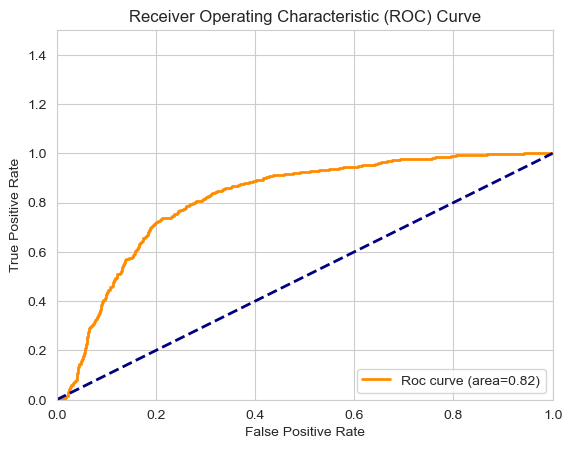

In [77]:
plt.plot(fpr_lr,tpr_lr,color='darkorange',lw=2,label='Roc curve (area=%0.2f)'% roc_auc_lr)
plt.plot([0,1],[0,1],color='navy',lw=2,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.5])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

Logistics Regression Recall: 74.33004231311706
Logistics Regression Precision: 49.67012252591895


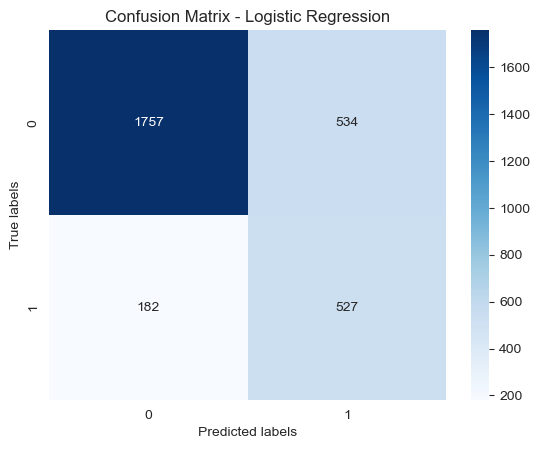

In [78]:
# Lets plot the confusion matrix of the LogisticRegression model
from sklearn.metrics import confusion_matrix
cm_lr=confusion_matrix(smote_y_test,y_pred)
recall_lr=cm_lr[1,1]/(cm_lr[1,0]+cm_lr[1,1])*100
precision_lr=cm_lr[1,1]/(cm_lr[0,1]+cm_lr[1,1])*100

print('Logistics Regression Recall:', recall_lr)
print('Logistics Regression Precision:', precision_lr)

sns.heatmap(cm_lr,annot=True,cmap='Blues',fmt='g')
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

In [79]:
# Lets use the RandomForestClassifier model and evaluate the performance

from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=100)

In [80]:
rfc_cv_scores=cross_val_score(rf,smote_x_train_resampled,smote_y_train_resampled,cv=kf,scoring='roc_auc')

In [81]:
print('rfc_CV Mean:', np.mean(rfc_cv_scores)*100)
print('rfc_CV std:', np.std(rfc_cv_scores))

rfc_CV Mean: 99.78185521136233
rfc_CV std: 0.0006454383375693099


# Wow! I performed the 5-Fold cross validation using RandomForestClassifier model and evaluated the performance using ROC_AUC. The performance shows 99.75% roc_auc score

In [82]:
# Lets plot the classification report of the cross validation of our RandomForestClassifier model
rf.fit(smote_x_train_resampled,smote_y_train_resampled)

RandomForestClassifier()

<AxesSubplot:>

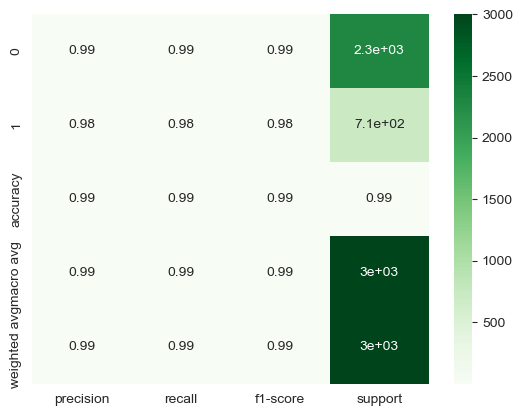

In [83]:
rf_y_pred=rf.predict(smote_x_test)
rf_report=classification_report(smote_y_test,rf_y_pred,output_dict=True)
rf_report_df=pd.DataFrame(rf_report).transpose()
sns.heatmap(rf_report_df,annot=True,cmap='Greens')

In [84]:
# Lets plot the ROC Curve for RandomForestClassifier model

y_pred_rf=rf.predict_proba(smote_x_test)[:,1]
fpr_rf,tpr_rf,thresholds_rf=roc_curve(smote_y_test,y_pred_rf)
roc_auc_rf=auc(fpr_rf,tpr_rf)

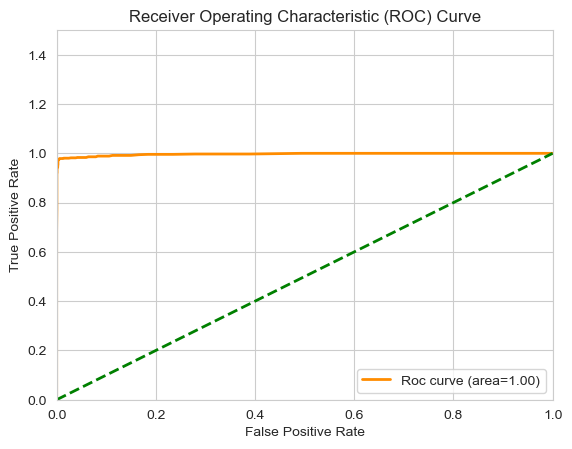

In [85]:
plt.plot(fpr_rf,tpr_rf,color='darkorange',lw=2,label='Roc curve (area=%0.2f)'% roc_auc_rf)
plt.plot([0,1],[0,1],color='green',lw=2,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.5])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

Logistics Regression Recall: 97.88434414668548
Logistics Regression Precision: 98.16124469589816


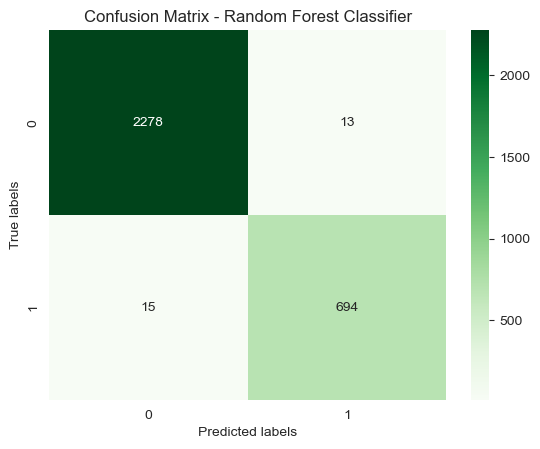

In [86]:
# Lets plot the confusion matrix of the RandomForestClassifier model

cm_rf=confusion_matrix(smote_y_test,rf_y_pred)

recall_rf=cm_rf[1,1]/(cm_rf[1,0]+cm_rf[1,1])*100
precision_rf=cm_rf[1,1]/(cm_rf[0,1]+cm_rf[1,1])*100
print('Logistics Regression Recall:', recall_rf)
print('Logistics Regression Precision:', precision_rf)

sns.heatmap(cm_rf,annot=True,cmap='Greens',fmt='g')
plt.title('Confusion Matrix - Random Forest Classifier')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

In [87]:
# Lets use the GradientBoostingClassifier model and evaluate the performance

from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier(n_estimators=100, learning_rate=0.1)

In [88]:
gb_cv_scores=cross_val_score(gb,smote_x_train_resampled,smote_y_train_resampled,cv=kf,scoring='roc_auc')
print('GB_CV_Mean:', np.mean(gb_cv_scores)*100)
print('GB_CV_Std:', np.std(gb_cv_scores))

GB_CV_Mean: 99.19752585414645
GB_CV_Std: 0.0018532018786434226


# The performance score of GradientBoostingClassifier is similar to RandomForestClassifier with 99.18% of roc_auc score

In [89]:
# Lets plot the classification report of the cross validation of GradientBoostingClassifier model
gb.fit(smote_x_train_resampled,smote_y_train_resampled)

GradientBoostingClassifier()

<AxesSubplot:>

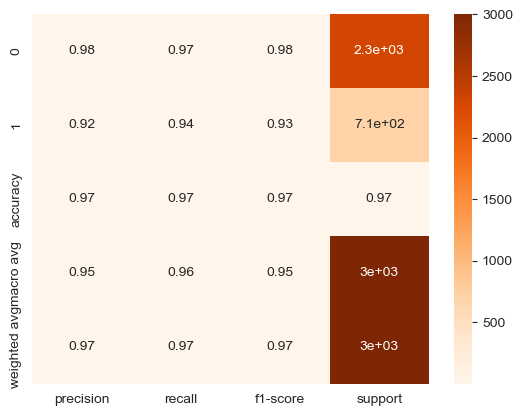

In [90]:
gb_y_pred=gb.predict(smote_x_test)
gb_report=classification_report(smote_y_test,gb_y_pred,output_dict=True)
gb_report_df=pd.DataFrame(gb_report).transpose()
sns.heatmap(gb_report_df,annot=True,cmap='Oranges')

In [91]:
# Lets plot the ROC Curve for GradientBoostingClassifier model

y_pred_gb=gb.predict_proba(smote_x_test)[:,1]
fpr_gb,tpr_gb,thresholds_gb=roc_curve(smote_y_test,y_pred_gb)
roc_auc_gb=auc(fpr_gb,tpr_gb)

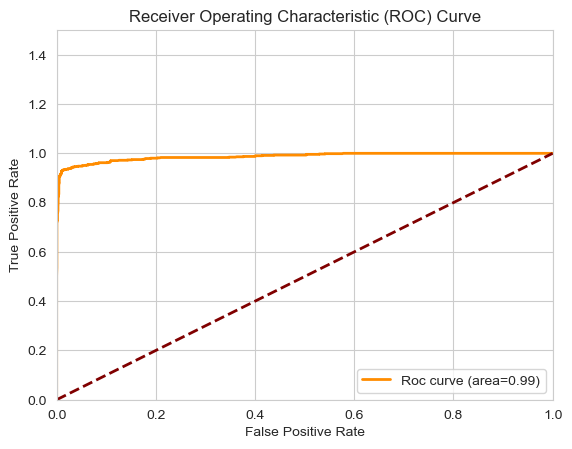

In [92]:
plt.plot(fpr_gb,tpr_gb,color='darkorange',lw=2,label='Roc curve (area=%0.2f)'% roc_auc_gb)
plt.plot([0,1],[0,1],color='maroon',lw=2,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.5])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

Logistics Regression Recall: 93.79407616361071
Logistics Regression Precision: 91.97786998616874


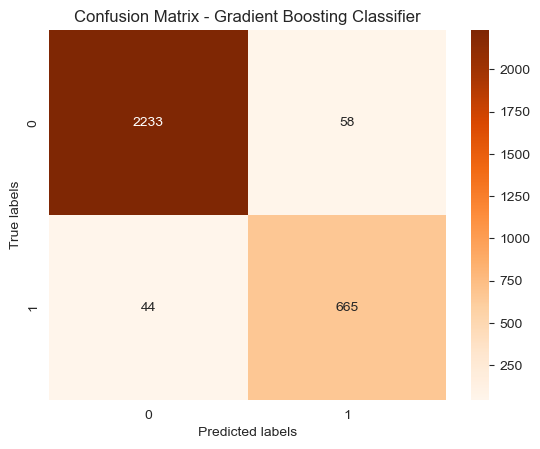

In [93]:
# Lets plot the confusion matrix of the GradientBoostingClassifier model

cm_gb=confusion_matrix(smote_y_test,gb_y_pred)

recall_gb=cm_gb[1,1]/(cm_gb[1,0]+cm_gb[1,1])*100
precision_gb=cm_gb[1,1]/(cm_gb[0,1]+cm_gb[1,1])*100
print('Logistics Regression Recall:', recall_gb)
print('Logistics Regression Precision:', precision_gb)

sns.heatmap(cm_gb,annot=True,cmap='Oranges',fmt='g')
plt.title('Confusion Matrix - Gradient Boosting Classifier')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

# By looking at the ROC_AUC score of all the 3 models, I can say "RandomForestClassifier" is the best model to predict employee turnover. 

# Based on the Confusion Matrix, I can see Recall is the metric that needs to be used for employee turnover as our focus is on False Negatives and the cost of False Negative is high

In [94]:
# Since we already have predicted the probability of employees' turnover using the best model, i.e. "RandomForestClassifier"
# Lets categorize the employees based on risk zones 

safe_zone=0.2
low_risk_zone=0.6
medium_risk_zone=0.9

predictions=[]
for prob in y_pred_rf:
    if prob < safe_zone:
        predictions.append('Safe Zone')
    elif prob < low_risk_zone:
        predictions.append('Low Risk Zone')
    elif prob < medium_risk_zone:
        predictions.append('Medium Risk Zone')
    else:
        predictions.append("High Risk Zone")

print(predictions)

['Safe Zone', 'Safe Zone', 'Safe Zone', 'Safe Zone', 'Safe Zone', 'Safe Zone', 'High Risk Zone', 'High Risk Zone', 'Safe Zone', 'Safe Zone', 'Safe Zone', 'Safe Zone', 'Safe Zone', 'Safe Zone', 'Safe Zone', 'High Risk Zone', 'Safe Zone', 'High Risk Zone', 'Safe Zone', 'Safe Zone', 'Safe Zone', 'Safe Zone', 'Safe Zone', 'Safe Zone', 'Safe Zone', 'Medium Risk Zone', 'Safe Zone', 'High Risk Zone', 'High Risk Zone', 'Safe Zone', 'Safe Zone', 'Safe Zone', 'Safe Zone', 'Safe Zone', 'Safe Zone', 'Safe Zone', 'Safe Zone', 'Safe Zone', 'Safe Zone', 'Safe Zone', 'Safe Zone', 'Low Risk Zone', 'Safe Zone', 'High Risk Zone', 'Safe Zone', 'Safe Zone', 'Safe Zone', 'Safe Zone', 'Safe Zone', 'Safe Zone', 'High Risk Zone', 'High Risk Zone', 'Safe Zone', 'High Risk Zone', 'High Risk Zone', 'Safe Zone', 'Safe Zone', 'High Risk Zone', 'Safe Zone', 'Safe Zone', 'Safe Zone', 'High Risk Zone', 'Safe Zone', 'High Risk Zone', 'Safe Zone', 'Safe Zone', 'Safe Zone', 'High Risk Zone', 'Safe Zone', 'High Risk Zone'